# Exercise 8.10 RK4 with adaptive step size 

Failed at time 124567899.62691243
Failed at time 166876891.53812632
Failed at time 203916007.4895565
Failed at time 237709317.74322402
Failed at time 269050737.00796705
Failed at time 298362746.75417805
Failed at time 325909009.18426853
Failed at time 351872389.7802021
Failed at time 376389930.9918325
Failed at time 399570604.9827803
Failed at time 421505122.1634329
Failed at time 442271687.97726756
Failed at time 461939541.98313934
Failed at time 480571214.0434189
Failed at time 498224005.62400496
Failed at time 514950989.1621468
Failed at time 530801697.33577937
Failed at time 545822613.7881651
Failed at time 560057528.9016874
Failed at time 573547805.2694308
Failed at time 586332583.4625618
Failed at time 598448945.5682825
Failed at time 609932049.4811008
Failed at time 620815242.016457
Failed at time 631130159.5675803
Failed at time 640906816.1009961
Failed at time 650173684.5612905
Failed at time 658957771.2992224
Failed at time 667284687.512397
Failed at time 675178715.5058651
Fa

C:\Users\jj356\AppData\Local\Temp\ipykernel_30012\2455590240.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  rho = 30*h*δ/sqrt(dx**2+dy**2)


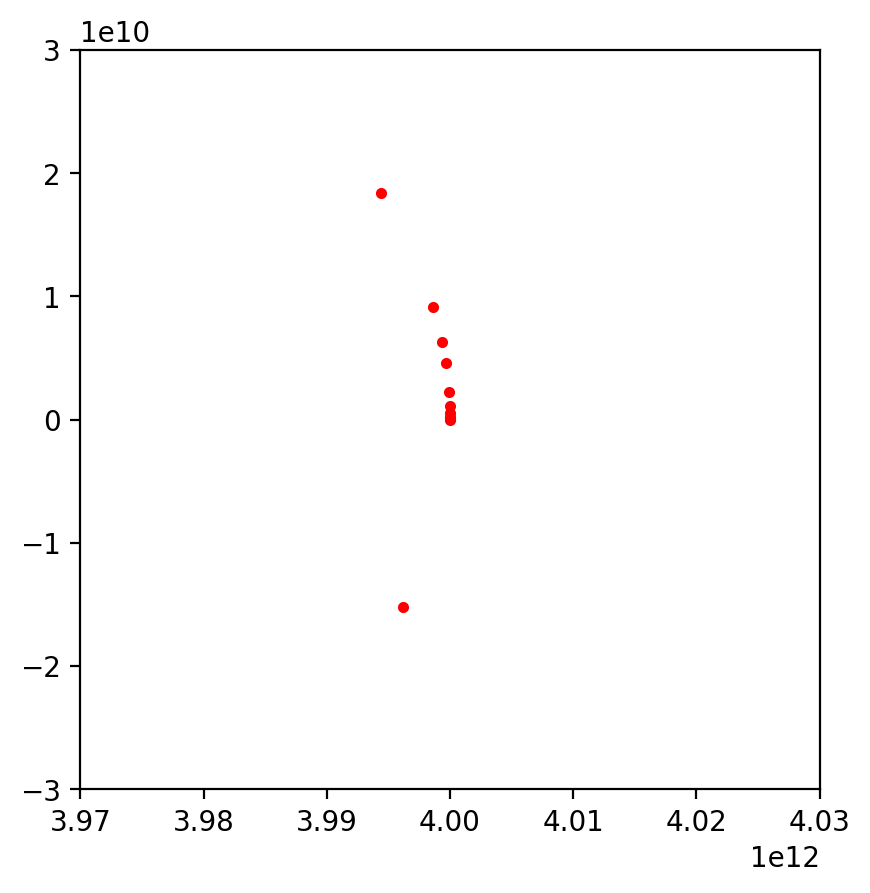

In [38]:
from numpy import array, sqrt, sign
from matplotlib import pyplot as plt

# define constants

G = 6.67e-11  # universal gravitation 
M = 1.989e30  # Solar mass
h = 3600*10  # guess at an okay step size in s
δ = 1000/3.15e7  # maximum error to compare with each step's error
tf = 1641805530*1

# set initial conditions

t = 0
x = 4e12  # initial position in m
y = 0
vx = 0
vy = 500  # initial y velocity

r = array([x,y,vx,vy],float)

# make lists for plotting
xlist = [x]
ylist = [y]
vxlist = [vx]
vylist = [vy]
tlist = [t]

# define f(r,t)
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    d = sqrt(x*x+y*y)
    return array([vx,
                vy,
                -G*M*x/d**3,
                -G*M*y/d**3],float) 

# solve ODE
while t<tf:
    r1 = r.copy()
    # do two steps of size h
    k1 = h*f(r1,t)
    k2 = h*f(r1+0.5*k1,t+0.5*h)
    k3 = h*f(r1+0.5*k2,t+0.5*h)
    k4 = h*f(r1+k3,t+h)
    r1 += (k1+2*k2+2*k3+k4)/6 # gets to the midpoint of the 2h interval
    
    k1 = h*f(r1,t+h)
    k2 = h*f(r1+0.5*k1,t+1.5*h)
    k3 = h*f(r1+0.5*k2,t+1.5*h)
    k4 = h*f(r1+k3,t+2*h)
    r1 += (k1+2*k2+2*k3+k4)/6 # gets to the endpoint of the 2h interval
    
    # do one step of size 2h
    r2 = r.copy()
    k1 = 2*h*f(r2,t)
    k2 = 2*h*f(r2+0.5*k1,t+h)
    k3 = 2*h*f(r2+0.5*k2,t+h)
    k4 = 2*h*f(r2+k3,t+2*h)
    r2 += (k1+2*k2+2*k3+k4)/6 # gets to the endpoint of the 2h interval
    
    # check if error is bigger than allowed
    dx = r1[0]-r2[0]
    dy = r1[1]-r2[1]
    
    rho = 30*h*δ/sqrt(dx**2+dy**2)
    
    if rho<1:
        # failed - set h to be new value and redo steps
        h *= rho**0.25
        print(f'Failed at time {t}')
        # no update on r
    else:
        # success! - move on to the next step
        #h *= rho**0.25
        h *= min(rho**0.25,2)
        if sign(r[1]) == -sign(r1[1]) and sign(r1[0])==1: #crosses x axis
            print(t) # troubleshooting
            
        r = r1.copy()  # r1 (the better estimate) is going to be our updated r
        t += 2*h
        
        
            
        xlist.append(r[0])
        ylist.append(r[1])
        vxlist.append(r[2])
        vylist.append(r[3])
        tlist.append(t)

fig, ax = plt.subplots(dpi=200)
ax.plot(xlist,ylist,'r.')
ax.plot(0,0,'yo')
ax.set_aspect('equal')
plt.xlim((-3e10+4e12,3e10+4e12))
plt.ylim((-3e10,3e10))
plt.show()
        